# Imports

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

# Create UserGenerator instance

In [2]:
from synabon.users import UserGenerator

In [3]:
n_users = 1000
start_dt = datetime.strptime("2023/01/01", "%Y/%m/%d")
end_dt = datetime.strptime("2023/02/01", "%Y/%m/%d")

In [4]:
from functools import partial

scale = 1000
start_balance_generator = partial(np.random.exponential, scale=scale)
end_balance_generator = partial(np.random.exponential, scale=scale + 100)
n_interactions_generator = partial(np.random.poisson, lam=10)

In [5]:
ug = UserGenerator(
    n_users,
    # start_balance_generator,
    # end_balance_generator,
    # n_interactions_generator,
    n_countries=5,
    p_countries=[0.1, 0.2, 0.3, 0.35, 0.05]
)

In [6]:
df = ug.get_data(
    start_balance_generator,
    end_balance_generator,
    n_interactions_generator,
    start_dt, 
    end_dt
)

In [7]:
df.head(10)

,user_id,user_balance,interaction_sum,interaction_type,transaction_commission,country,device,date
0,b79ad341-116d-4e2b-9252-92610662f45a,1860.400018,NaN,registration,NaN,United Arab Emirates,Mozilla/5.0 (Windows NT 5.0) AppleWebKit/531.1...,2023-01-01
1,5bfb64a8-6c73-4743-9c01-2a31bbc51028,677.289230,NaN,registration,NaN,Myanmar,Mozilla/5.0 (X11; Linux i686; rv:1.9.6.20) Gec...,2023-01-01
2,dcc55d2b-dcd4-4be9-b3cd-2bfa670ba19d,576.031408,NaN,registration,NaN,United Arab Emirates,Mozilla/5.0 (iPad; CPU iPad OS 4_2_1 like Mac ...,2023-01-01
3,ce300912-5ec2-498e-b038-5352bfa3bfc2,405.657598,NaN,registration,NaN,Japan,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,2023-01-01
4,112b723c-cbde-4c8f-9aba-cfb063bd8580,62.264234,NaN,registration,NaN,Japan,Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...,2023-01-01
5,0a0764e2-d253-4861-9e36-cf7b7e80672a,1128.937102,NaN,registration,NaN,Japan,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_1...,2023-01-01
6,afde21f1-81e1-41b0-ad79-af5d51fdd8ea,528.667792,NaN,registration,NaN,Japan,Mozilla/5.0 (Linux; Android 3.2.1) AppleWebKit...,2023-01-01
7,16d12737-07d0-4fed-9c78-97210e19f262,2162.901317,NaN,registration,NaN,Japan,Mozilla/5.0 (Android 2.1; Mobile; rv:28.0) Gec...,2023-01-01
8,2a175f55-1ec9-4966-9a7b-3cc9eba3254a,2222.522304,NaN,registration,NaN,United Arab Emirates,Mozilla/5.0 (Windows; U; Windows NT 5.1) Apple...,2023-01-01
9,a2a32d77-6b92-430f-bfa8-f6e8166a3549,1771.457793,NaN,registration,NaN,Japan,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_3 like...,2023-01-01


In [8]:
df.shape

(11106, 8)

In [9]:
df["user_id"].nunique()

1000

# Let's see the distribution of balances at the start

In [10]:
mask = df["interaction_type"] == "registration"
df_start = df[mask]
df_start.shape

(1000, 8)

<Axes: xlabel='user_balance', ylabel='Count'>

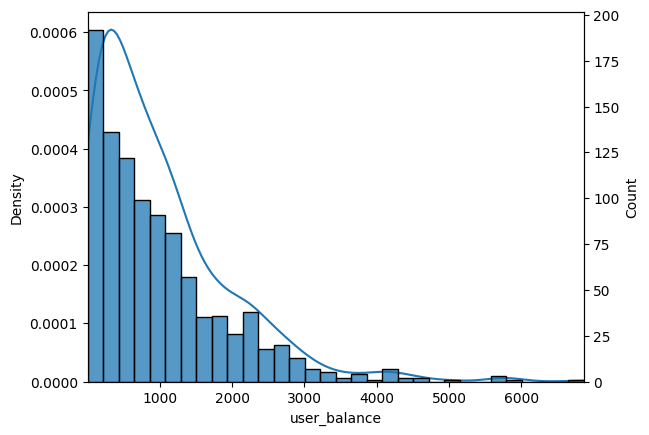

In [11]:
fig, ax1 = plt.subplots()
sns.kdeplot(data=df_start, x="user_balance", ax=ax1)
ax1.set_xlim((df_start["user_balance"].min(), df_start["user_balance"].max()))
ax2 = ax1.twinx()
sns.histplot(data=df_start, x="user_balance", ax=ax2)

# Let's see how the balances of some users changed

In [12]:
user_ids = np.random.choice(df["user_id"].unique(), size=3)
mask = (df["user_id"].isin(user_ids))
user_df = df[mask]
user_df.head(5)

,user_id,user_balance,interaction_sum,interaction_type,transaction_commission,country,device,date
289,d7c42afd-be8d-4abc-a693-6d8e53844e54,1085.729796,NaN,registration,NaN,Myanmar,Mozilla/5.0 (Windows CE) AppleWebKit/535.1 (KH...,2023-01-01 00:00:00
592,82617fd7-4857-4c71-9e75-a907c943400d,107.962747,NaN,registration,NaN,Myanmar,Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...,2023-01-01 00:00:00
922,5bebf3bb-e691-49e9-8225-d3746fbd26b1,1774.605845,NaN,registration,NaN,United Arab Emirates,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,2023-01-01 00:00:00
1634,d7c42afd-be8d-4abc-a693-6d8e53844e54,1987.024357,901.294561,transaction,2.703884,Myanmar,Mozilla/5.0 (Windows CE) AppleWebKit/535.1 (KH...,2023-01-03 10:42:39
1652,d7c42afd-be8d-4abc-a693-6d8e53844e54,337.388638,-1649.635720,transaction,4.948907,Myanmar,Mozilla/5.0 (Windows CE) AppleWebKit/535.1 (KH...,2023-01-03 11:38:05


In [13]:
user_df.shape

(33, 8)

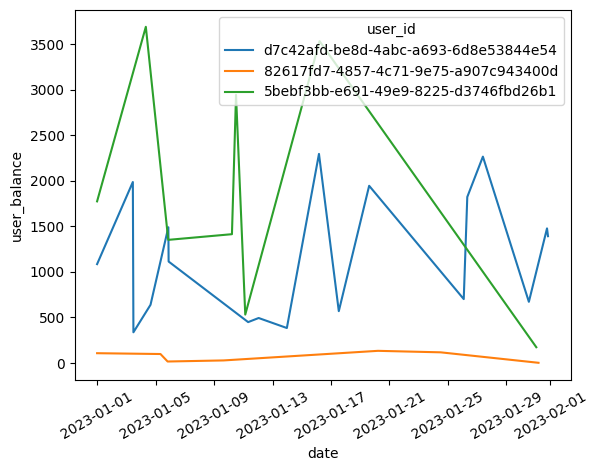

In [14]:
g = sns.lineplot(x="date", y="user_balance", hue="user_id", data=user_df)
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=30)

# Let's look at the distribution of balances at the end

In [15]:
df_last = df.sort_values(by="date").groupby(by="user_id").tail(1)

In [16]:
df_last.head()

,user_id,user_balance,interaction_sum,interaction_type,transaction_commission,country,device,date
4441,91ffe0e2-a3ad-4c7f-b962-588a1492818d,1122.576923,-934.486808,transaction,2.803460,Japan,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_1...,2023-01-11 13:05:42
4501,3ae725b5-6a4e-4ba1-8dba-546d8274717a,251.568561,-668.877466,transaction,2.006632,Japan,Mozilla/5.0 (iPod; U; CPU iPhone OS 4_0 like M...,2023-01-11 15:58:00
5620,c8ffe3dc-6e93-4a51-b1fb-559c8034a60a,1747.204782,760.128778,transaction,2.280386,Bangladesh,Mozilla/5.0 (Linux; Android 3.2.5) AppleWebKit...,2023-01-16 02:27:02
5651,b9782478-6467-42e4-bc72-3c5f6e2bd398,621.062669,331.764659,transaction,0.995294,United Arab Emirates,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6...,2023-01-16 04:13:51
5813,8f0ac417-f5ea-4f41-8157-7393392ce615,1871.677422,-2753.110923,transaction,8.259333,Bangladesh,Mozilla/5.0 (X11; Linux i686; rv:1.9.7.20) Gec...,2023-01-16 11:17:52


In [17]:
df_last.shape

(1000, 8)

<Axes: xlabel='user_balance', ylabel='Count'>

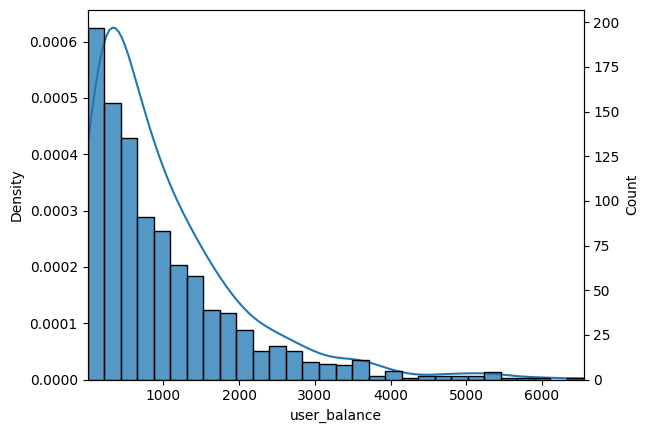

In [18]:
fig, ax1 = plt.subplots()
sns.kdeplot(data=df_last, x="user_balance", ax=ax1)
ax1.set_xlim((df_last["user_balance"].min(), df_last["user_balance"].max()))
ax2 = ax1.twinx()
sns.histplot(data=df_last, x="user_balance", ax=ax2)

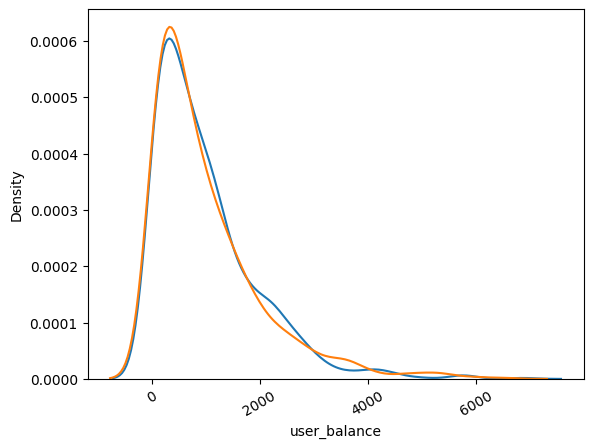

In [19]:
g = sns.kdeplot(x="user_balance", data=df_start)
g = sns.kdeplot(x="user_balance", data=df_last)
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [20]:
print(f"MEAN Before: {np.mean(df_start['user_balance'])}")
print(f"MEAN After: {np.mean(df_last['user_balance'])}")


MEAN Before: 1006.1351838138693
MEAN After: 1013.6629469918526


# Let's look at the behavior of commission

In [21]:
mask = df["interaction_type"] != "registration"
df_commission = df[mask]
df_commission["cumsum"] = df_commission["transaction_commission"].cumsum()


In [22]:
df_commission.head()

,user_id,user_balance,interaction_sum,interaction_type,transaction_commission,country,device,date,cumsum
1000,003b6d0e-7a93-47d6-b4d7-742ec9bfd459,691.219372,242.939034,transaction,0.728817,Myanmar,Mozilla/5.0 (compatible; MSIE 6.0; Windows 98;...,2023-01-02 00:02:01,0.728817
1001,19467306-f3ad-4ef1-8a47-fca61266fd9a,2652.758853,1727.752454,transaction,5.183257,Myanmar,Mozilla/5.0 (Android 1.6; Mobile; rv:25.0) Gec...,2023-01-02 00:03:44,5.912074
1002,104ced6d-ba5a-49ee-b1df-abee7a645fa9,6554.707050,6298.063608,transaction,18.894191,United Arab Emirates,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.5.20) G...,2023-01-02 00:07:35,24.806265
1003,09cd93aa-7e30-486d-8680-2ba4dadd3323,437.777873,230.862038,transaction,0.692586,United Arab Emirates,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,2023-01-02 00:07:36,25.498851
1004,90918cd2-c292-4fd3-ad2b-0ea2b0ad32f0,779.703043,-1161.991234,transaction,3.485974,Bangladesh,Opera/9.67.(X11; Linux i686; aa-ET) Presto/2.9...,2023-01-02 00:08:35,28.984825


In [23]:
df_commission.tail()

,user_id,user_balance,interaction_sum,interaction_type,transaction_commission,country,device,date,cumsum
11101,c70bb0c6-d111-4fa5-9c2f-768bcb5c82ea,759.500132,111.334386,transaction,0.334003,Myanmar,Mozilla/5.0 (compatible; MSIE 6.0; Windows 98;...,2023-01-31 23:48:19,30288.465924
11102,685bb210-79f9-42e4-b0c1-b56ed60e5b7b,1632.839518,1054.368305,transaction,3.163105,Bangladesh,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7...,2023-01-31 23:51:57,30291.629029
11103,18eb9736-f0b6-4b30-ba09-4ddce7c68856,895.022619,-3142.166080,transaction,9.426498,Japan,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,2023-01-31 23:52:19,30301.055527
11104,186881ce-9df5-4f34-b2e1-21cd3de5aa3e,1.772938,-2229.065105,transaction,6.687195,Myanmar,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_9_3...,2023-01-31 23:58:32,30307.742723
11105,9cc8eea0-f947-4d6a-a7fe-7c0630f437f1,2709.498884,-636.422911,transaction,1.909269,Myanmar,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_1...,2023-01-31 23:59:40,30309.651991


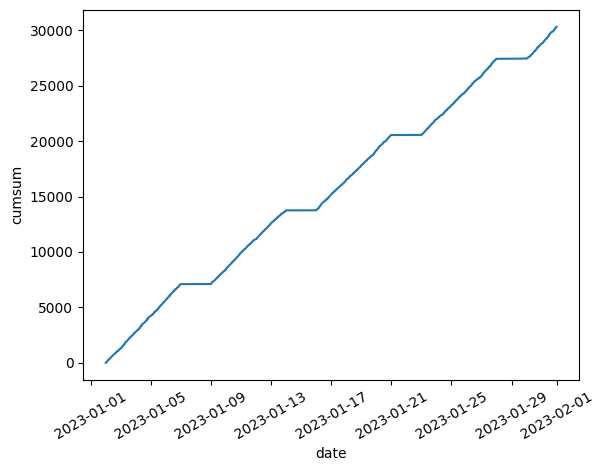

In [24]:
# в промежутки времени когда cumsum=const наступили выходные. Нет транзакций - нет коммиссии.
g = sns.lineplot(x="date", y="cumsum", data=df_commission)
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=30)

# Let's look at the distribution of the number of interactions

In [25]:
mask = df["interaction_type"] != "registration"
df_inter = df[mask]
df_inter["trunc_date"] = df_inter["date"].dt.strftime("%Y/%m/%d")
df_day = df_inter.groupby("user_id").size().reset_index(name="count_transactions")
df_day.head()

,user_id,count_transactions
0,003b6d0e-7a93-47d6-b4d7-742ec9bfd459,14
1,0052e811-1f75-47bc-8c84-80e7ddebf7c1,12
2,005a3285-dc2a-4bc9-bb5e-7ae6535b5b00,6
3,00cd2f7f-b4fe-4f71-b23f-04c85e210b3d,5
4,00e48cfd-21ae-41aa-8e46-844addbc7a86,9


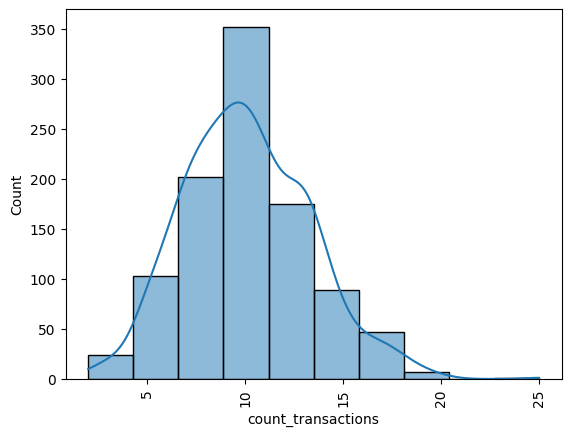

In [26]:
g = sns.histplot(x="count_transactions", data=df_day, bins=10, kde=True)
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=90)

# Let's look at the distribution of countries

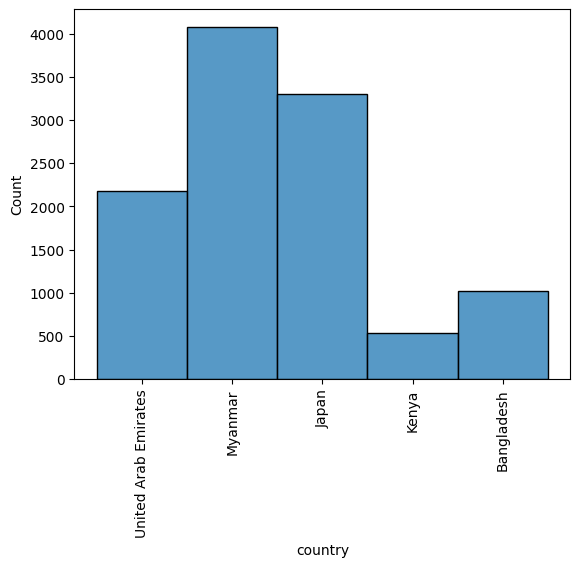

In [27]:
g = sns.histplot(x="country", data=df)
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=90)

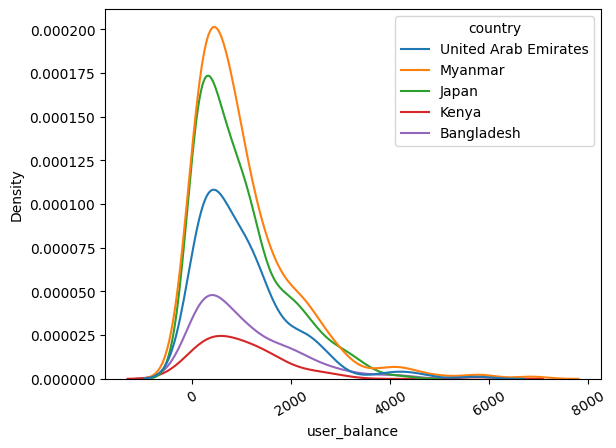

In [28]:
g = sns.kdeplot(x="user_balance", data=df_start, hue="country")
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=30)

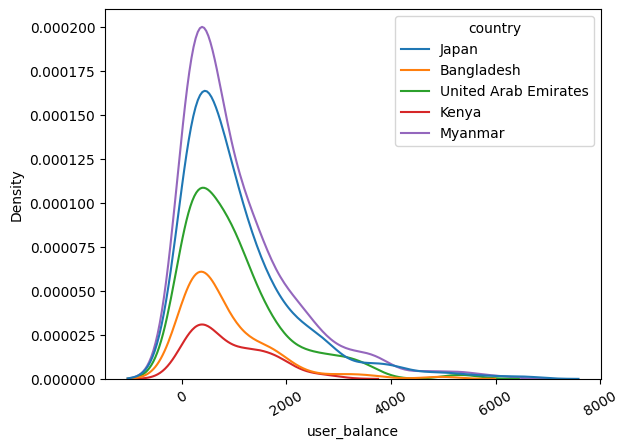

In [29]:
g = sns.kdeplot(x="user_balance", data=df_last, hue="country")
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=30)

# Split into groups

In [33]:
all_idxes = df["user_id"].unique().tolist()
all_idxes[:5], len(all_idxes)

(['b79ad341-116d-4e2b-9252-92610662f45a',
  '5bfb64a8-6c73-4743-9c01-2a31bbc51028',
  'dcc55d2b-dcd4-4be9-b3cd-2bfa670ba19d',
  'ce300912-5ec2-498e-b038-5352bfa3bfc2',
  '112b723c-cbde-4c8f-9aba-cfb063bd8580'],
 1000)

In [34]:
control_idx = np.random.choice(all_idxes, int(len(all_idxes)/2), replace=False)
control_idx[:5], len(control_idx)

(array(['31d5b740-cbfd-4ded-b504-f8bc3e5caed6',
        'f964b53d-35cf-4e6e-b4f2-425d7776a60f',
        '24b73f45-a376-41ca-a77b-f6118604271f',
        '0494155f-9c6b-41bd-9ca8-e3d63c0dc0e1',
        '388a1b47-dff6-43b5-b2f1-8dfa8b876efc'], dtype='<U36'),
 500)

In [35]:
df.head()

,user_id,user_balance,interaction_sum,interaction_type,transaction_commission,country,device,date
0,b79ad341-116d-4e2b-9252-92610662f45a,1860.400018,NaN,registration,NaN,United Arab Emirates,Mozilla/5.0 (Windows NT 5.0) AppleWebKit/531.1...,2023-01-01
1,5bfb64a8-6c73-4743-9c01-2a31bbc51028,677.289230,NaN,registration,NaN,Myanmar,Mozilla/5.0 (X11; Linux i686; rv:1.9.6.20) Gec...,2023-01-01
2,dcc55d2b-dcd4-4be9-b3cd-2bfa670ba19d,576.031408,NaN,registration,NaN,United Arab Emirates,Mozilla/5.0 (iPad; CPU iPad OS 4_2_1 like Mac ...,2023-01-01
3,ce300912-5ec2-498e-b038-5352bfa3bfc2,405.657598,NaN,registration,NaN,Japan,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,2023-01-01
4,112b723c-cbde-4c8f-9aba-cfb063bd8580,62.264234,NaN,registration,NaN,Japan,Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...,2023-01-01


In [62]:
control_df = (
    df.set_index("user_id")
    .loc[control_idx]
    .reset_index()
)

In [63]:
control_df.shape

(5538, 8)

In [64]:
control_df["user_id"].nunique()

500

In [66]:
control_df.head()

,user_id,user_balance,interaction_sum,interaction_type,transaction_commission,country,device,date
0,31d5b740-cbfd-4ded-b504-f8bc3e5caed6,927.674607,NaN,registration,NaN,Myanmar,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,2023-01-01 00:00:00
1,31d5b740-cbfd-4ded-b504-f8bc3e5caed6,1527.526399,599.851793,transaction,1.799555,Myanmar,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,2023-01-02 15:18:23
2,31d5b740-cbfd-4ded-b504-f8bc3e5caed6,421.158852,-1106.367547,transaction,3.319103,Myanmar,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,2023-01-03 08:08:02
3,31d5b740-cbfd-4ded-b504-f8bc3e5caed6,624.307822,203.148970,transaction,0.609447,Myanmar,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,2023-01-09 20:08:37
4,31d5b740-cbfd-4ded-b504-f8bc3e5caed6,1478.832228,854.524407,transaction,2.563573,Myanmar,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,2023-01-10 18:32:08


In [67]:
from datetime import timedelta

scale = 1100
start_balance_generator = partial(np.random.exponential, scale=scale)
end_balance_generator = partial(np.random.exponential, scale=scale + 100)
n_interactions_generator = partial(np.random.poisson, lam=10)

new_control_df = ug.append_data(
    control_df,
    end_balance_generator,
    n_interactions_generator,
)